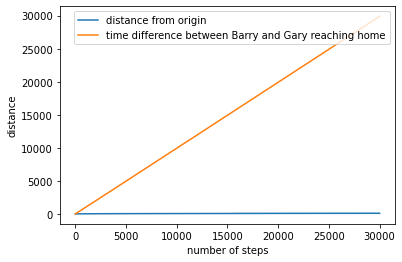

cubic fit co-efficients are given by:  [ 3.29716296e-12 -2.11280743e-07  6.31930082e-03  1.26150349e+01]


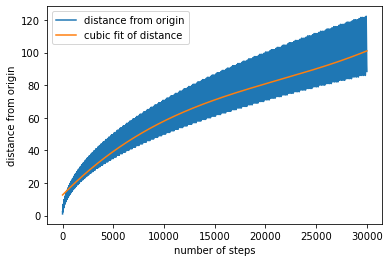

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# a function to simulate spiral and return final position after n steps
def spiral_coordinates(steps):
    x, y = 0, 0
    dx, dy = 0, -1
    step_count = 0

    while step_count < steps:
        if x == y or (x < 0 and x == -y) or (x > 0 and x == 1 - y):
            dx, dy = -dy, dx
        x, y = x + dx, y + dy
        step_count += 1

    return (x, y)


# a function to calculate the distane of a point from the origin
def distance(point):
    x = np.linalg.norm(point)
    return x


#finding the distance for 30000 steps in the spiral
ns = np.arange(1,30000)
spiralcoords = []
distances = []
differences = []
for elements in ns:
    k = spiral_coordinates(elements)
    spiralcoords.append(k)
    distances.append(distance(k))
    differences.append(elements-distance(k))
    
#plotting
plt.plot(ns, distances, label="distance from origin")
plt.plot(ns, differences, label="time difference between Barry and Gary reaching home")
plt.xlabel("number of steps")
plt.ylabel("distance")
plt.legend()
plt.show()

#polynomial fitting
hmm = np.polyfit(ns, distances, 3)
polynomial = np.poly1d(hmm)
print("cubic fit co-efficients are given by: ",hmm)
m = hmm[0]
c = hmm[1]

#more plotting
plt.plot(ns, distances, label="distance from origin")
plt.plot(ns, polynomial(ns), label="cubic fit of distance")
#plt.plot(ns, (distances-polynomial(ns)), label="prediction error")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("distance from origin")
plt.show()